In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import colormaps, color_sequences
sns.set_style("darkgrid")


In [3]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)

CLEAN DATA

In [4]:
#remove unused columns
data = data.drop("country", axis = 1)
data = data.drop("latitude", axis = 1)
data = data.drop("longitude", axis = 1)
data = data.drop('INT_LOG', axis = 1)
data = data.drop('INT_IDEO', axis = 1)
data = data.drop('INT_MISC', axis = 1)
data = data.drop('INT_ANY', axis = 1)
data = data.drop("location", axis = 1)
data = data.drop("addnotes", axis = 1)
data = data.drop("dbsource", axis = 1)
data = data.drop("summary", axis = 1)
data = data.drop("provstate", axis = 1)
data = data.drop("alternative_txt", axis = 1)
data = data.drop(["attacktype3", "attacktype3_txt"], axis = 1)
data = data.drop("ransomnote", axis = 1)

In [5]:
#change column label
data.rename(columns={"country_txt" : "country", "region_txt":"region" }, inplace = True)
data.rename(columns = {"crit1" : "crit_socioeconomic", "crit2" : "crit_intimidate", "crit3" : "crit_outside-law"}, inplace = True)

OVERVIEW OF IMPORTANT COLUMNS:
- extended: indicating whether the incident happened in more than 24 hours
- crit1: terrorism for political/social/economic purposes
- crit2: terrorism for intimidation/coercion
- crit3: terrorism aimed at civilians
- multiple: indicating whether the attack is part of a series of related/planned attacks
- success: indicating whether the attack was successful
- ishostkid: indicating whether the terrorists capture hostages
- nhostkid: Number of hostages taken
- kidhijcountry: name of the country where the terrorists captured the hostages
- ransom: indicating whether ransom was demanded
- hostkidoutcome: the outcome of hostages
- related: ID of related attacks (only applicable if multiple == 1)

Terrorism is on the rise

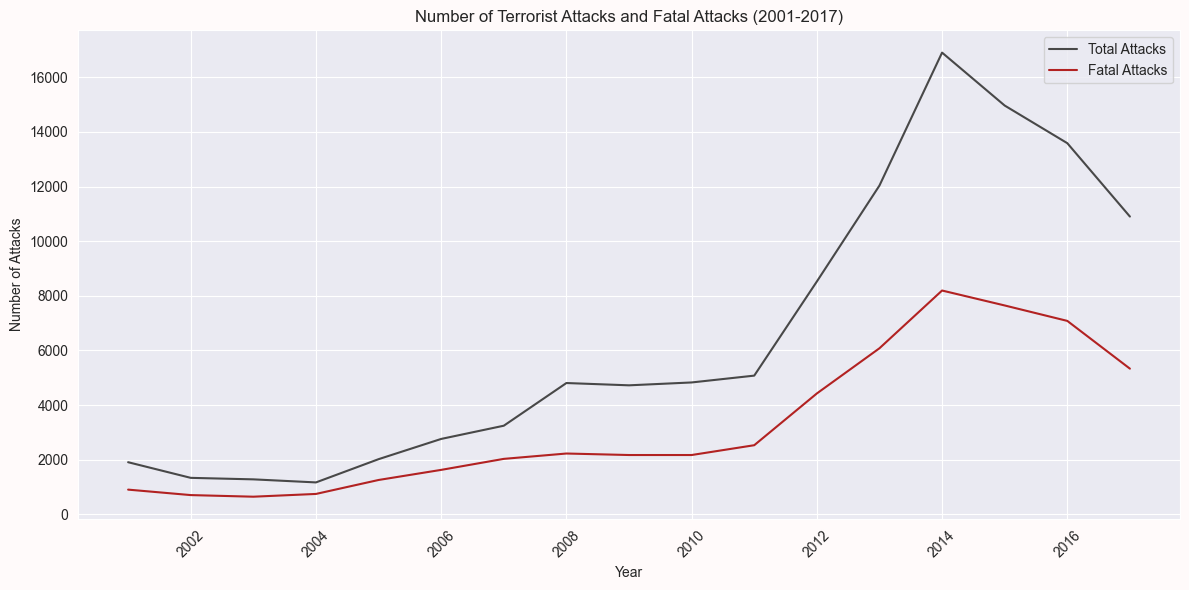

In [6]:
FatalAttacks = data[(data['nkill'].notnull()) & (data['nkill'] != 0)]
AttacksPerYear = data['iyear'].value_counts().sort_index()
FatalAttacksPerYear = FatalAttacks['iyear'].value_counts().sort_index()
plotdata = pd.DataFrame({'Total Attacks': AttacksPerYear, 'Fatal Attacks': FatalAttacksPerYear})
plotdata = plotdata.loc[2001:2017]
plt.figure(figsize=(12, 6), facecolor="snow", alpha = 0.1)
plt.plot(plotdata.index, plotdata['Total Attacks'], label='Total Attacks', color='#484848')
plt.plot(plotdata.index, plotdata['Fatal Attacks'], label='Fatal Attacks', color='firebrick')

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks and Fatal Attacks (2001-2017)')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

We can see:
- Slight increase in the number of attacks during 2007 - 2008
- The line skyrocketed in the 2011 - 2014 period

Though it's important to note that the number of fatal attacks (meaning the number of attacks where there is at least 1 dead) has not kept up the same pace as the total number of attacks

Mean of fatality

In [7]:
print(data['nkill'].mean())

2.4032722986614385


Mode of fatality

In [8]:
print(data['nkill'].mode())

0    0.0
Name: nkill, dtype: float64


Mean of wounded

In [9]:
print(data['nwound'].mean())

3.1676684000483735


Mode of wounded

In [10]:
print(data['nwound'].mode())

0    0.0
Name: nwound, dtype: float64


How overwhelmingly dominant are the attacks with few fatalities

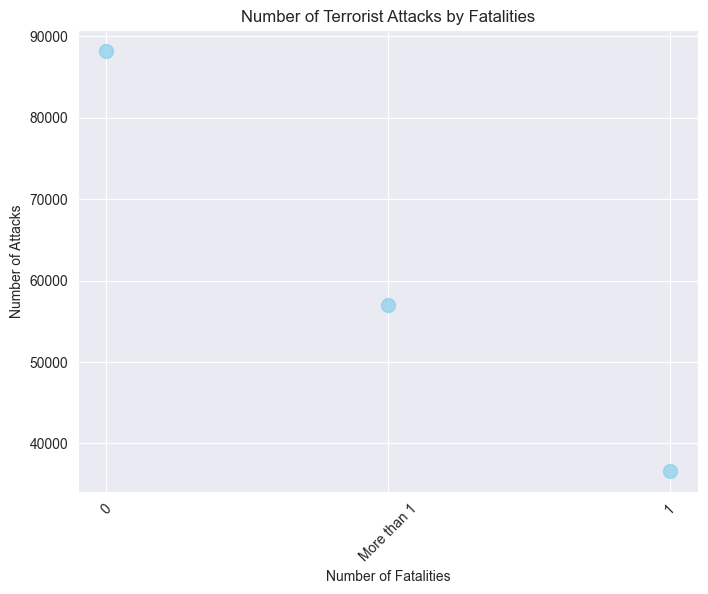

In [11]:
FatalitiesCount = data['nkill'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else 'More than 1'))
AttacksByFatalities = FatalitiesCount.value_counts()
plt.figure(figsize=(8, 6))
plt.scatter(AttacksByFatalities.index, AttacksByFatalities.values, s=100, color='skyblue', alpha=0.7)
plt.title('Number of Terrorist Attacks by Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

-->CONTRARY TO POPULAR BELIEF, TERRORIST ATTACKS OFTEN LEAVE VERY FEW CASUALTY
The fear they spread is usually due to how they are perceived: dangerous, calculated, leaving tons of casualties in their arrival. But how much of it is true? And would they keep the same rate of fatality going into the future?

TERRORISM IS REACTIONARY BY NATURE

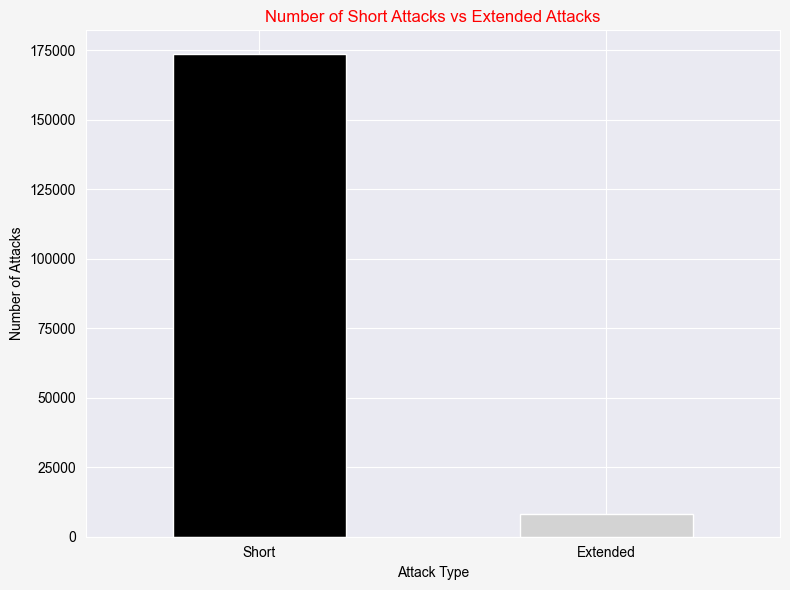

In [12]:
AttackDuration = data['extended'].value_counts()
colors = ['black', 'lightgray']
plt.figure(figsize=(8, 6), facecolor="whitesmoke", alpha = 0.1)
AttackDuration.plot(kind='bar', color=colors)
plt.title('Number of Short Attacks vs Extended Attacks', color='red') 
plt.xlabel('Attack Type', color='black')
plt.ylabel('Number of Attacks', color='black')
plt.xticks(ticks=[0, 1], labels=['Short', 'Extended'], rotation=0, color='black') 
plt.yticks(color='black') 
plt.tight_layout()
plt.show()

Terrorists often attack with low coordinance, as the number of coordinated attack vs uncoordinated attack:

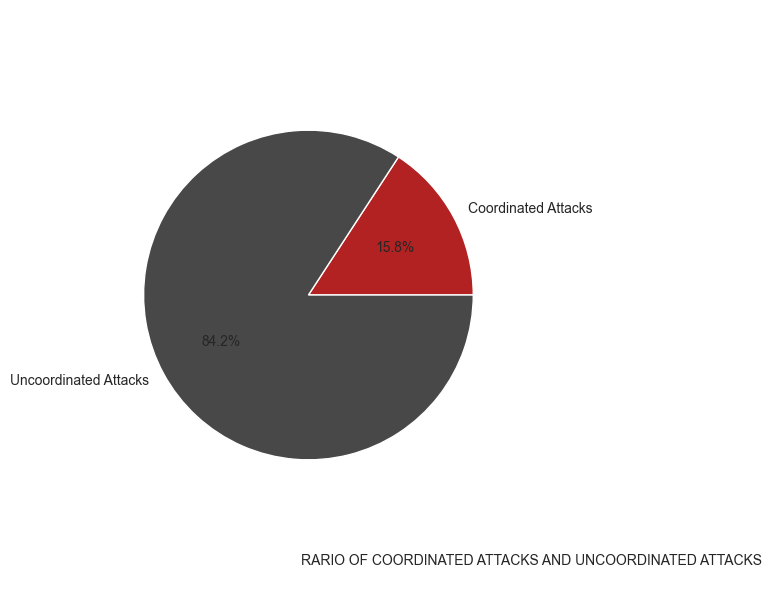

In [14]:
CoordinatedAttacks = data[(data['related'].notnull()) & (data['iyear'] > 1997)]
UncoordinatedAttacks = data[(data['related'].isnull()) & (data['iyear'] > 1997)]
CoordinatedCount = CoordinatedAttacks.shape[0]
UncoordinatedCount = UncoordinatedAttacks.shape[0]
TotalAttacks = CoordinatedCount + UncoordinatedCount
CoordinatedRatio = CoordinatedCount / TotalAttacks
UncoordinatedRatio = UncoordinatedCount / TotalAttacks
labels = ['Coordinated Attacks', 'Uncoordinated Attacks']
ratios = [CoordinatedRatio, UncoordinatedRatio]
colors = ['firebrick', '#484848']
plt.figure(figsize=(6, 6))
plt.pie(ratios, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.figtext(0.5, 0.05, "RARIO OF COORDINATED ATTACKS AND UNCOORDINATED ATTACKS")
plt.show()

In [ ]:
#DISCLAIMER:
#The above chart is partially incorrect, since the database only adopted the columns "multiple" and "related" after 1997. I chose to only include attacks where
#we can know for sure whether it was coordinated

The state of terrorism weapons

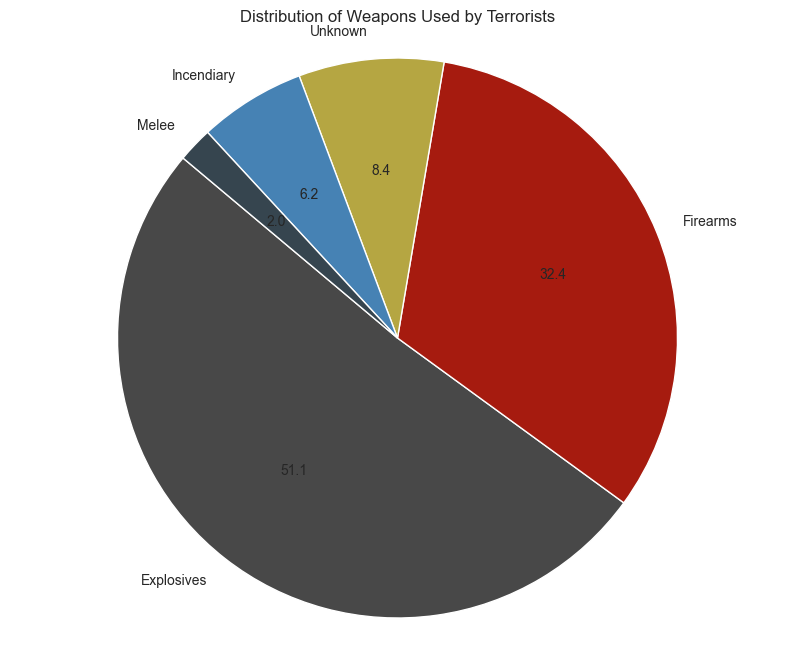

In [ ]:
WeaponCounts = data['weaptype1_txt'].value_counts()
WeaponCounts = WeaponCounts.head(5)
plt.figure(figsize=(10, 8))
colors = ['#484848', '#a61b0f', '#b5a642', '#4682b4', '#36454f']
plt.pie(WeaponCounts, labels=WeaponCounts.index, autopct='%.1f', startangle=140, colors=colors, )
plt.title('Distribution of Weapons Used by Terrorists')
plt.axis('equal')
plt.show()

--> Terrorists tend to use easily obtainable weapons (explosives, firearms)

Highly dangerous weapons (at least by comparison) such as biological/chemical/radiological/nuclear don't even show up in the top 5 most used types

Let's go deeper to see whether their weapons are truly incomplex:

Types of weapons in "Explosives" 

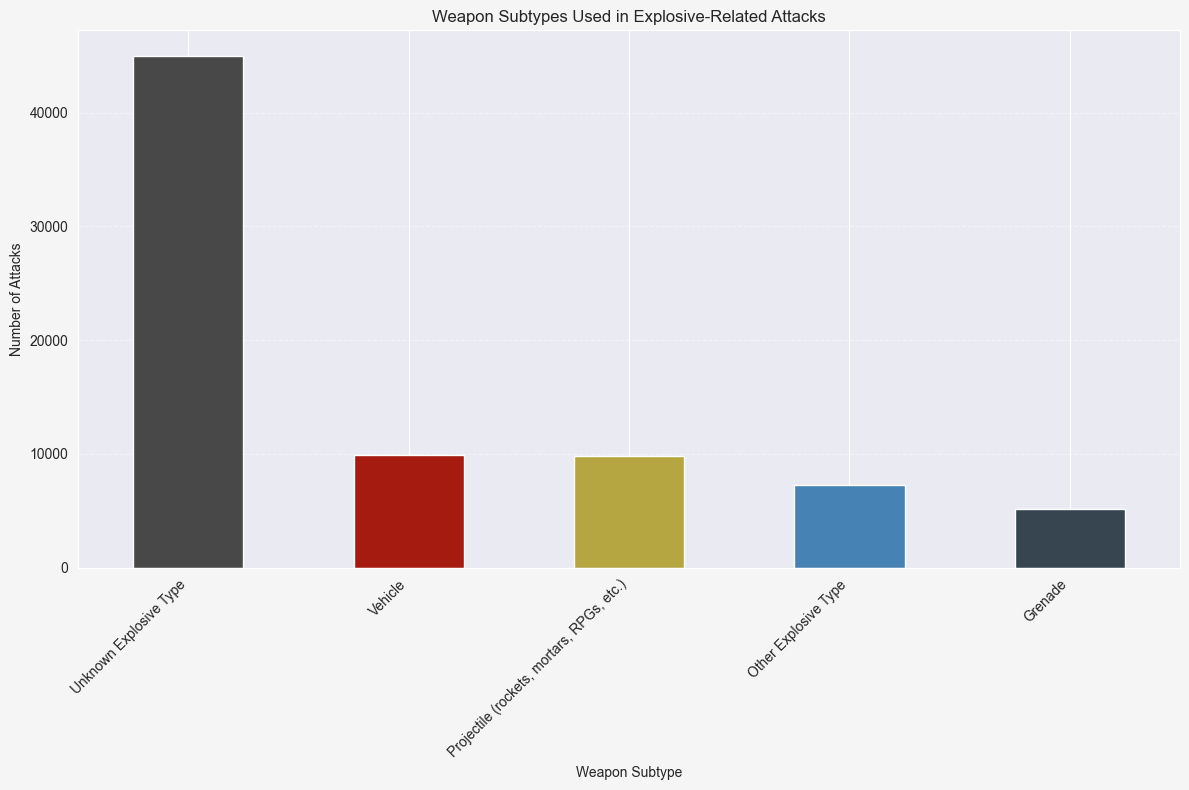

In [ ]:
Explosives_df = data[data['weaptype1_txt'] == 'Explosives']
WeaponSubtypeCount = Explosives_df['weapsubtype1_txt'].value_counts().head(5)
colors = ['#484848', '#a61b0f', '#b5a642', '#4682b4', '#36454f']
plt.figure(figsize=(12, 8), facecolor="whitesmoke")
WeaponSubtypeCount.plot(kind='bar', color=colors)
plt.title('Weapon Subtypes Used in Explosive-Related Attacks')
plt.xlabel('Weapon Subtype')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Most popular explosive types:
- Vehicle
- Projectile
- Other explosive type
- Grenade

Types of weapons in **"Firearms"**

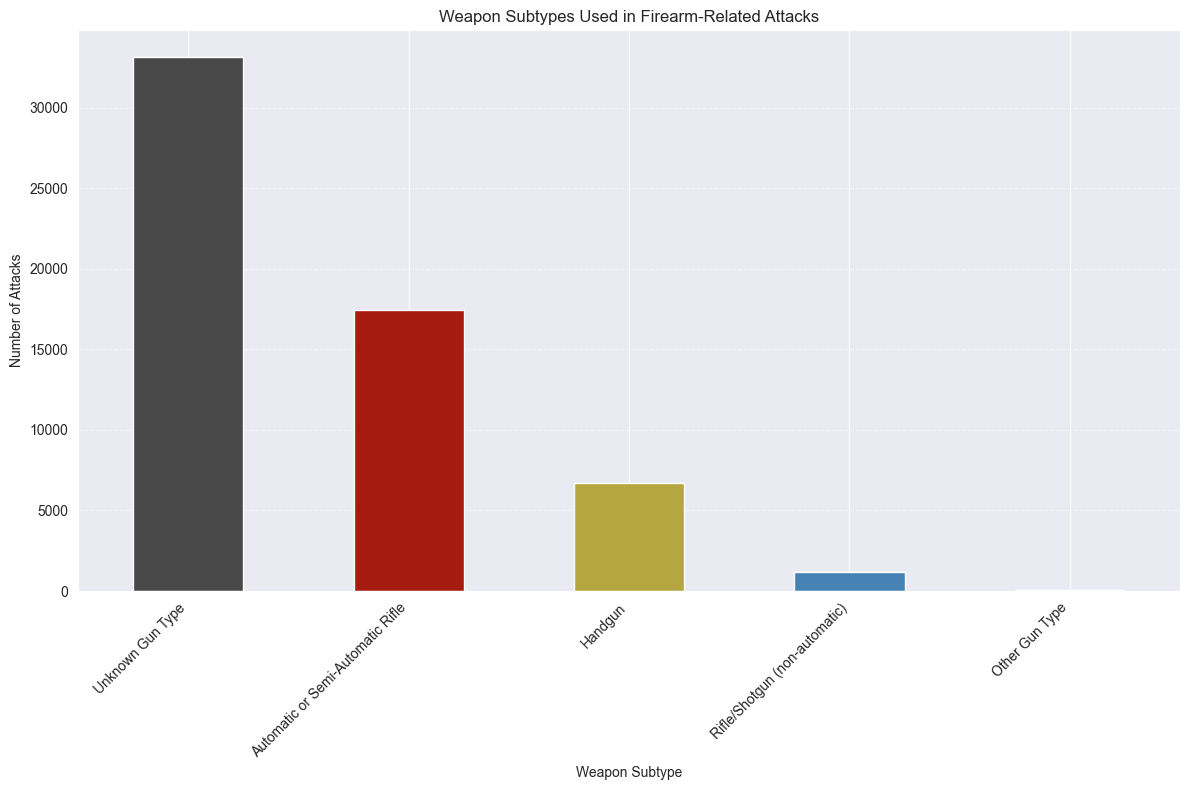

In [ ]:
Firearms_df = data[data['weaptype1_txt'] == 'Firearms']
WeaponSubtypeCount = Firearms_df['weapsubtype1_txt'].value_counts().head(5)
plt.figure(figsize=(12, 8))
colors = ['#484848', '#a61b0f', '#b5a642', '#4682b4', '#36454f']
WeaponSubtypeCount.plot(kind='bar', color=colors)
plt.title('Weapon Subtypes Used in Firearm-Related Attacks')
plt.xlabel('Weapon Subtype')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Most popular firearms types:
- Automatic/Semi-automatic rifle
- Handgun
- Rifle/shotgun

Are terrorists interested in revolutionizing their weapon of choice?

Types of weapons used over the years:

<Figure size 1200x800 with 0 Axes>

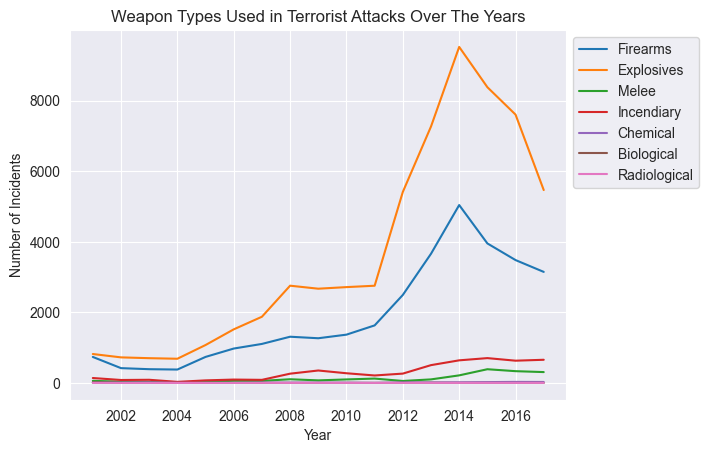

In [ ]:
WeaponOverTheYears = data[['iyear', 'weaptype1_txt']][data['iyear'] >= 2001 ]
WeaponCount = WeaponOverTheYears.groupby(['iyear', 'weaptype1_txt']).size().unstack(fill_value = 0)
HighlightedWeaponTypes = [
    "Firearms", "Explosives", "Melee", "Incendiary", 
    "Chemical", "Biological", "Radiological"
]
WeaponCountHighlighted = WeaponCount[HighlightedWeaponTypes]
plt.figure(figsize=(12, 8))
WeaponCountHighlighted.plot(kind='line')
plt.title('Weapon Types Used in Terrorist Attacks Over The Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

--> Biological & Chemical & Radiological does not fluctuate over the years. Terrorists either have no interest in them or have no resource to do so

CONCLUSION OF PART 1 - FOR SECURITY EXECS - MISCONCEPTIONS IN TERRORISM OPERATIONS
- Terrorists attacks very often conclude in under 24 hours
- Large-scale attacks, like 9/11, are special cases. There are very few casualties (persons) caused by terrorists
- Despite technological advancements, their weapon of choice are easily obtainable weapons, ones that can be easily manufactured, maintained, transported, exported & imported without facing regulations
- Terrorists, either due to not having enough resource or not being interested, so far have shown no desire to revolutionize their weapons

--> **The nature of terrorism is short-lived, terrifying but not dangerous in the fatality aspect, type of operation.**

--> **They favor easily obtainable, easily operated with very low cost, and are not interested in modernizing their arsenal.**

--> **It's rather pointless to try and minimize the already tiny casualty numbers that the terrorists put up. As long as there are problems in the world, there will be frustrated people turning to reactionary behavior, as long as there are frustrated people, there will be terrorists, as long as there are terrorists, there will be casualties, to the very humble amount**

--> **It's best we look into the state of hostage security to see where we can improve**

**PART 2. POLICY MAKERS - HOW TO MITIGATE THE AFTERMATH (HOSTAGES SITUATIONS)**

While personel damage is not very concerning, we should concern about the aspect of hostages

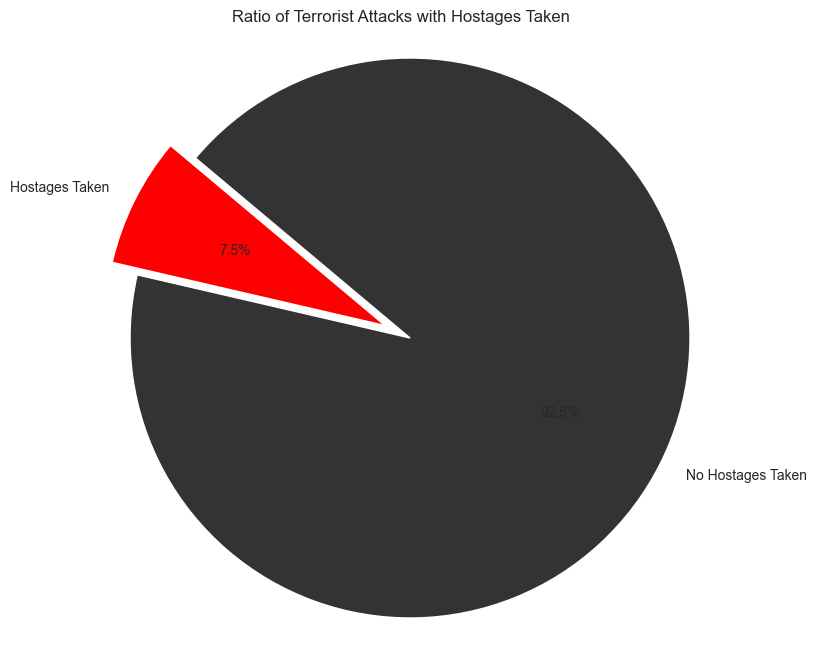

In [ ]:
HostageCount = data['ishostkid'].value_counts()

HostagesTaken = HostageCount.get(1, 0)
NoHostagesTaken = HostageCount.get(0, 0)

labels = ['Hostages Taken', 'No Hostages Taken']
sizes = [HostagesTaken, NoHostagesTaken]
colors = ['red', '#333333']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Terrorist Attacks with Hostages Taken')
plt.axis('equal') 
plt.show()

How many hostages return safely?

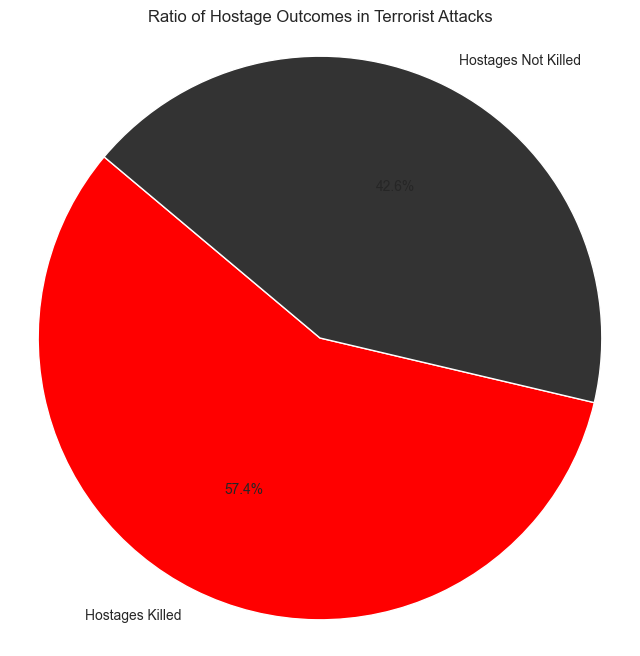

In [ ]:
HostageOutcomesCount = data['hostkidoutcome'].value_counts()

NotRescuedCode = [1, 3, 4, 7]
RescuedCode = [2, 5, 6]

NotRescuedCount = HostageOutcomesCount[NotRescuedCode].sum()
RescuedCount = HostageOutcomesCount[RescuedCode].sum()
labels = ['Hostages Killed', 'Hostages Not Killed']
sizes = [NotRescuedCount, RescuedCount]
colors = ['red', '#333333']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Hostage Outcomes in Terrorist Attacks')
plt.axis('equal') 
plt.show()

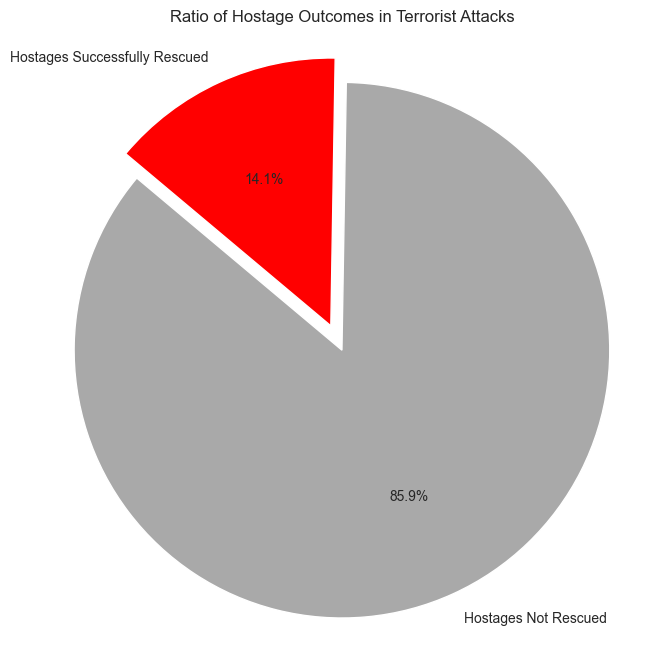

In [ ]:
HostageOutcomesCount = data['hostkidoutcome'].value_counts()
NotRescuedCode = [1,2, 3, 4, 7]
RescuedCode = [5, 6]
NotRescuedCount = HostageOutcomesCount[NotRescuedCode].sum()
RescuedCount = HostageOutcomesCount[RescuedCode].sum()
labels = ['Hostages Not Rescued', 'Hostages Successfully Rescued']
sizes = [NotRescuedCount, RescuedCount]
colors = ['darkgray', 'red']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Ratio of Hostage Outcomes in Terrorist Attacks')
plt.axis('equal') 
plt.show()

--> It's important to figure out what to do in cases involving hostages

Some overview of hostages situations

Which type of attack has the most chances of hostages being involved?

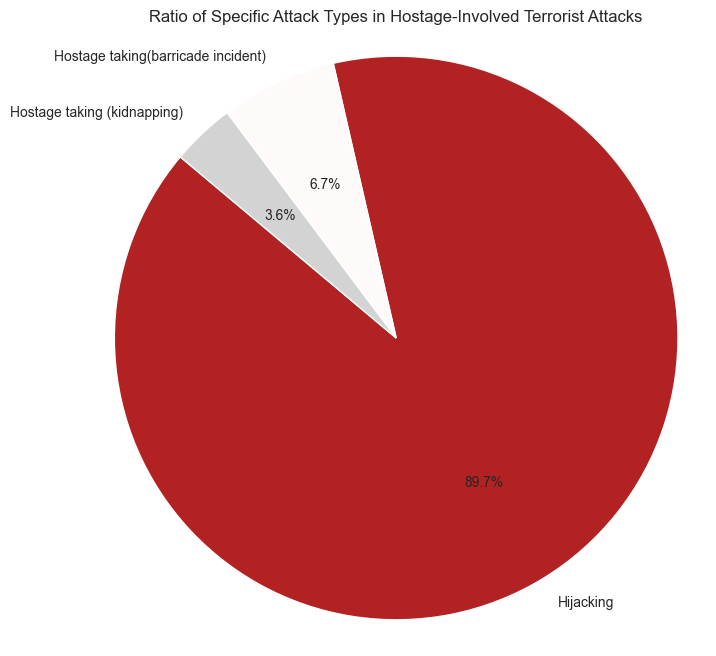

In [ ]:
HostageAttacks_df = data[data['ishostkid'] == 1]
HostageAttackTypes = [ 4, 5, 6]
HostageAttackTypesCount = HostageAttacks_df[HostageAttacks_df['attacktype1'].isin(HostageAttackTypes)]['attacktype1'].value_counts()
HostageAttackTypesCount = HostageAttackTypesCount.head(8)
labels = ["Hijacking", "Hostage taking(barricade incident)", "Hostage taking (kidnapping)"]
sizes = HostageAttackTypesCount.values
colors = ['firebrick', 'snow', 'lightgray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Specific Attack Types in Hostage-Involved Terrorist Attacks')
plt.axis('equal')
plt.show()

Casualties in each type of attack

C:\Users\Duc\AppData\Local\Temp\ipykernel_19316\239350751.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HostagesKilled_df['attacktype1_txt'] = HostagesKilled_df['attacktype1'].map(HighlightedAttackType)


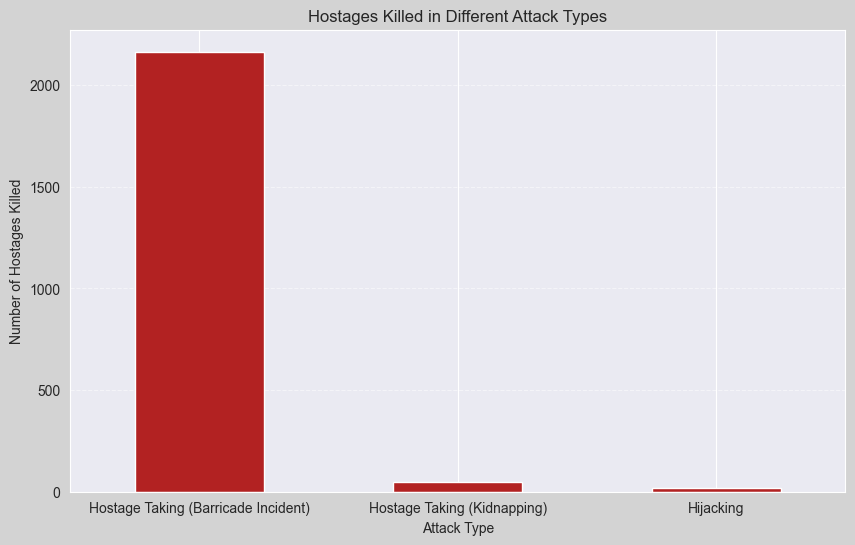

In [ ]:
DesiredAttackTypes = [4, 5, 6]  # Attack types 4, 5, 6 correspond to different types of hostage taking
HostagesKilled_df = data[(data['attacktype1'].isin(DesiredAttackTypes)) & (data['hostkidoutcome'] == 4)]
HostagesKilledCount = HostagesKilled_df['attacktype1'].value_counts()
HighlightedAttackType = {
    4: "Hijacking",
    5: "Hostage Taking (Kidnapping)",
    6: "Hostage Taking (Barricade Incident)"
}
HostagesKilled_df['attacktype1_txt'] = HostagesKilled_df['attacktype1'].map(HighlightedAttackType)
HostagesKilledCount = HostagesKilled_df['attacktype1_txt'].value_counts()
plt.figure(figsize=(10, 6), facecolor='lightgray', alpha = 0.2)
HostagesKilledCount.plot(kind='bar', color='firebrick')
plt.title('Hostages Killed in Different Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Hostages Killed')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

--> We should look into how to prevent hijaacking/kidnapping and most importantly, barricade incidents, from happening

Perhaps insights into their preferred mode of navigation might help?

C:\Users\Duc\AppData\Local\Temp\ipykernel_19316\4285408406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  HostageAttacks_df['divert'].fillna('Unknown', inplace=True)
C:\Users\Duc\AppData\Local\Temp\ipykernel_19316\4285408406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HostageAttacks_df['divert'].fillna('Unknown', inplace=True)
C:\

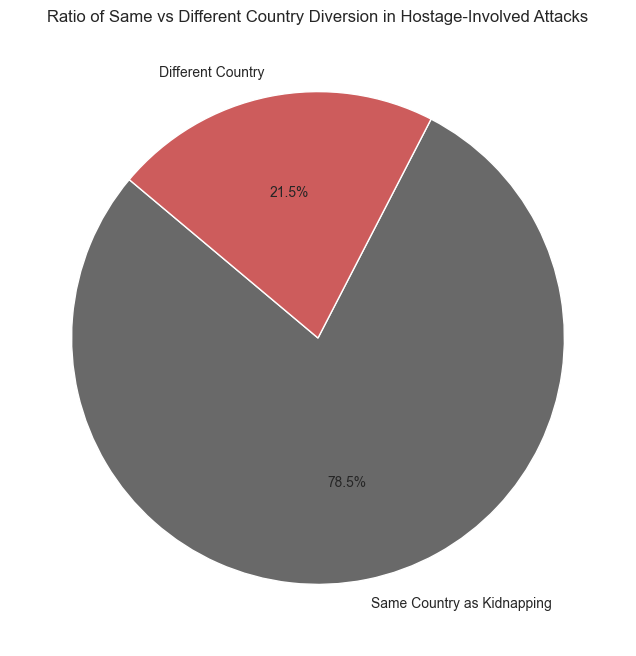

In [ ]:
HostageAttacks_df = data[data['ishostkid'] == 1]
HostageAttacks_df['divert'].fillna('Unknown', inplace=True)
HostageAttacks_df['kidhijcountry'].fillna('Unknown', inplace=True)

HostageAttacks_df['divert'] = HostageAttacks_df['divert'].str.title()
HostageAttacks_df['kidhijcountry'] = HostageAttacks_df['kidhijcountry'].str.title()
SameCountryCounts = (HostageAttacks_df['divert'] == HostageAttacks_df['kidhijcountry']).sum()
DifferentCountryCounts = (HostageAttacks_df['divert'] != HostageAttacks_df['kidhijcountry']).sum()
TotalAttacks = SameCountryCounts + DifferentCountryCounts
SameCountryRatio = SameCountryCounts / TotalAttacks
DifferentCountryRatio = DifferentCountryCounts / TotalAttacks
labels = ['Same Country as Kidnapping', 'Different Country']
sizes = [SameCountryRatio, DifferentCountryRatio]
colors = ['dimgray', 'indianred']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Same vs Different Country Diversion in Hostage-Involved Attacks')

plt.show()

The effectiveness of paying ransom in barricade incident

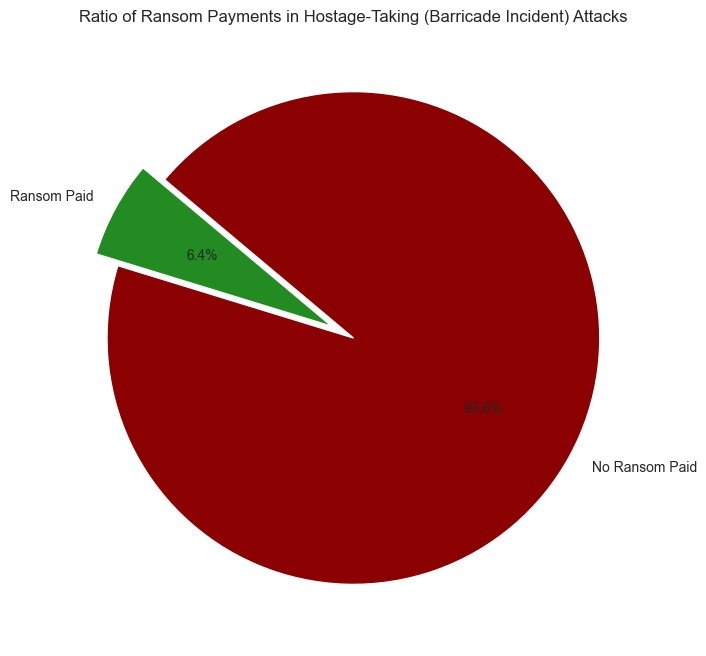

In [ ]:
BarricadeAttacks_df = data[data['attacktype1'] == 6]
RansomPaidCount = BarricadeAttacks_df['ransompaid'].notnull().sum()
NoRansomCount = BarricadeAttacks_df['ransompaid'].isnull().sum() + (BarricadeAttacks_df['ransompaid'] == 0).sum()
labels = ['Ransom Paid', 'No Ransom Paid']
sizes = [RansomPaidCount, NoRansomCount]
colors = ['forestgreen', 'darkred']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Ratio of Ransom Payments in Hostage-Taking (Barricade Incident) Attacks')
plt.show()

--> The problem may or may not lie in our reluctance to negotiate with terrorists